In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
df = pd.read_csv(r"C:\Users\Jason\Downloads\simpsons_paradox_performance_data.csv")
df

,Employee_ID,Work_Hours,Remote_Work,Performance_Score
0,1,44.967142,No,100.138123
1,2,38.617357,No,96.627454
2,3,46.476885,Yes,121.804807
3,4,55.230299,No,105.099560
4,5,37.658466,No,96.970140
...,...,...,...,...
495,496,45.389100,No,97.922704
496,497,29.627538,No,98.768967
497,498,38.096613,No,96.159967
498,499,31.243817,Yes,95.665973


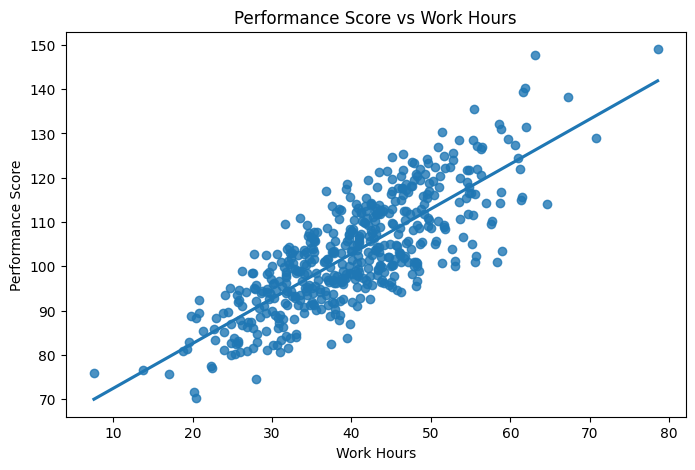

In [21]:
df['Remote_Work'] = df['Remote_Work'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(8, 5))
sns.regplot(x='Work_Hours', y='Performance_Score', data=df, ci=None)
plt.xlabel('Work Hours')
plt.ylabel('Performance Score')
plt.title('Performance Score vs Work Hours')
plt.show()

<Figure size 800x500 with 0 Axes>

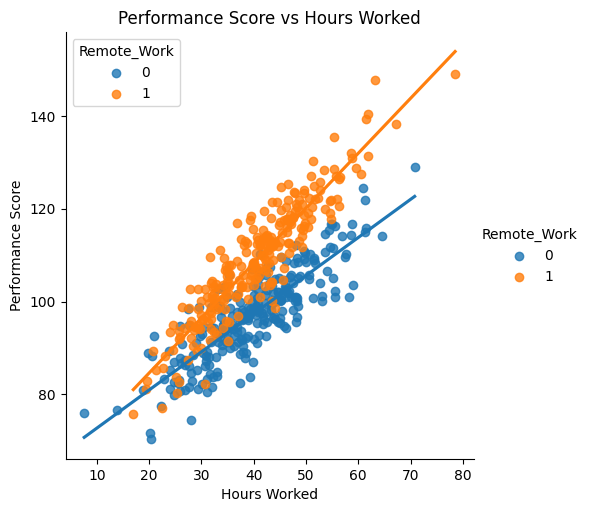

In [22]:
plt.figure(figsize=(8, 5))
sns.lmplot(x='Work_Hours', y='Performance_Score', hue='Remote_Work', data=df, ci=None)
plt.xlabel('Hours Worked')
plt.ylabel('Performance Score')
plt.title('Performance Score vs Hours Worked')
plt.legend(title='Remote_Work')
plt.show()

Model Discussion:

The aggregate regression plot: shows the overall relationship between Hours_Worked and Preformance_Score. This relationship suggests the a greater number of hours worked correlates with a greater preformance score.

The subgroup regression plot: shows the distinction between remote and non remote work. This suggests two different correlation values that show a greater increase in preformance score based off of hours worked for those who are remote workers.

In [23]:
#Regression Analyisis: Aggregate Model
X_agg = sm.add_constant(df['Work_Hours'])
model_agg = sm.OLS(df['Performance_Score'], X_agg).fit()
print("Aggregate Regression:\n", model_agg.summary())

Aggregate Regression:
                             OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     850.4
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          8.60e-110
Time:                        21:33:38   Log-Likelihood:                -1723.7
No. Observations:                 500   AIC:                             3451.
Df Residuals:                     498   BIC:                             3460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.2990      1.

In [24]:
#Regression Analysis: Subgroup Model
X_subgroup = sm.add_constant(df[['Work_Hours', 'Remote_Work']])
model_subgroup = sm.OLS(df['Performance_Score'], X_subgroup).fit()
print("Subgroup Regression:\n", model_subgroup.summary())

Subgroup Regression:
                             OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1143.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.14e-186
Time:                        21:33:38   Log-Likelihood:                -1542.0
No. Observations:                 500   AIC:                             3090.
Df Residuals:                     497   BIC:                             3103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.5361      

Aggregate Model Regression Equation: Work_Preformance = 62.299 + 1.035 * Work_Hours

Subgroup Model Regression Equation: Work_Preformance = 57.5361 + 0.9971 * Work_Hours + 10.9338 * Remote_Work
